In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import os, time, sys
import matplotlib.colors as mcolors
sns.set_style("whitegrid")

## Train models

In [2]:
import yaml
sys.path.insert(0,'../')
from train_baseline_ensemble import main_run as main_run_ensemble
from train_baseline_input import main_run as main_run_input
from train import main_run as main_run

storage_pd= pd.DataFrame()
columns_ = ["training_time", "prediction_time_full", "prediction_time_S2_S2VI_100", "prediction_time_S2_S2VI_S1_100", "prediction_time_S1_weather_DEM_100"]

/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open(f"./config_time/baseline_inputTempD.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run_input(config_file)
storage_pd["ITempD-co"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/baseline_inputSensD.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run_input(config_file)
storage_pd["ISensD-co"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/baseline_featureSensD.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FSensD-cr"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/baseline_featureCoM.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoMl-co"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/baseline_ensemble.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run_ensemble(config_file)
storage_pd["ESensI-av"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

#---------------
with open(f"./config_time/com_average.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoM-av"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/com_gated.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoM-ga"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/com_cross.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoM-cr"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/com_memory.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoM-me"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]


Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 285501.35it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 532230.98it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:


Training with 19761 samples and validating on 9881
Initial parameters of model: "input_dim_to_stack": [2, 2, 2, 12]
"loss_args":          {'name': 'ce', 'weight': tensor([0.4331, 3.4307, 0.3464, 2.3982, 0.9846, 7.8107, 2.6418, 1.1638, 7.2385,
        0.6344])}
"predictive_model":   Sequential(
  (0): Generic_Encoder(
    (pre_encoder): TempCNN(
      (conv_layers): Sequential(
        (0): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(18, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
            (3): Dropout(p=0.2, inplace=False)
          )
        )
        (1): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Missing logger folder: /home/mena/Documents/repos/com-views/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type                | Params
--------------------------------------------------------
0 | views_encoder   | ModuleDict          | 0     
1 | fusion_module   | FusionModuleMissing | 0     
2 | prediction_head | Sequential          | 1.0 M 
3 | criteria        | CrossEntropyLoss    | 0     
-------------------------------------------

Epoch 0: 100%|██████████| 155/155 [00:02<00:00, 62.84it/s, v_num=0, train_objective=1.670]

Metric val_objective improved. New best score: 1.177


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 66.54it/s, v_num=0, train_objective=1.360]

Metric val_objective improved by 0.150 >= min_delta = 0.01. New best score: 1.026


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 66.48it/s, v_num=0, train_objective=0.952]

Metric val_objective improved by 0.072 >= min_delta = 0.01. New best score: 0.954
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 65.55it/s, v_num=0, train_objective=0.952]
Training done


/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:


Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Input-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Input-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Input-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/1 in Input finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 279889.06it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 527518.03it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "input_dim_to_stack": [2, 2, 2, 12]
"loss_args":          {'name': 'ce', 'weight': tensor([0.4326, 3.4729, 0.3509, 2.3723, 0.9696, 7.2651, 2.7033, 1.2027, 6.7907,
        0.6204])}
"predictive_model":   Sequential(
  (0): Generic_Encoder(
    (pre_encoder): TempCNN(
      (conv_layers): Sequential(
        (0): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(18, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
            (3): Dropout(p=0.2, inplace=False)
          )
        )
        (1): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()


Metric val_objective improved. New best score: 1.131


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 69.06it/s, v_num=1, train_objective=0.942]

Metric val_objective improved by 0.102 >= min_delta = 0.01. New best score: 1.029


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 63.40it/s, v_num=1, train_objective=1.680]

Metric val_objective improved by 0.027 >= min_delta = 0.01. New best score: 1.002
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 62.54it/s, v_num=1, train_objective=1.680]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Input-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Input-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Input-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/1 in Input finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 289043.11it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 546050.72it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "input_dim_to_stack": [2, 2, 2, 12]
"loss_args":          {'name': 'ce', 'weight': tensor([0.4402, 3.3666, 0.3497, 2.2741, 0.9635, 6.8381, 2.7333, 1.1941, 7.3739,
        0.6214])}
"predictive_model":   Sequential(
  (0): Generic_Encoder(
    (pre_encoder): TempCNN(
      (conv_layers): Sequential(
        (0): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(18, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
            (3): Dropout(p=0.2, inplace=False)
          )
        )
        (1): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()


Metric val_objective improved. New best score: 1.072


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 61.18it/s, v_num=2, train_objective=1.030]

Metric val_objective improved by 0.031 >= min_delta = 0.01. New best score: 1.041


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 59.56it/s, v_num=2, train_objective=0.908]

Metric val_objective improved by 0.092 >= min_delta = 0.01. New best score: 0.949
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 58.65it/s, v_num=2, train_objective=0.908]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Input-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Input-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Input-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/1 in Input finished...
Epochs for Input runs on average for 0.00 epochs +- 0.000
Finished whole execution of 1 runs in 46.97 secs
Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the view

100%|██████████| 29642/29642 [00:00<00:00, 272235.62it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 504709.27it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "input_dim_to_stack": [2, 2, 2, 12]
"loss_args":          {'name': 'ce', 'weight': tensor([0.4331, 3.4307, 0.3464, 2.3982, 0.9846, 7.8107, 2.6418, 1.1638, 7.2385,
        0.6344])}
"predictive_model":   Sequential(
  (0): Generic_Encoder(
    (pre_encoder): TempCNN(
      (conv_layers): Sequential(
        (0): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(18, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
            (3): Dropout(p=0.2, inplace=False)
          )
        )
        (1): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()


Metric val_objective improved. New best score: 1.213


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 58.67it/s, v_num=3, train_objective=1.220]

Metric val_objective improved by 0.112 >= min_delta = 0.01. New best score: 1.100


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 62.98it/s, v_num=3, train_objective=1.630]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 62.93it/s, v_num=3, train_objective=1.630]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Input-SD-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Input-SD-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Input-SD-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/1 in Input-SD finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 273323.67it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 503046.98it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "input_dim_to_stack": [2, 2, 2, 12]
"loss_args":          {'name': 'ce', 'weight': tensor([0.4326, 3.4729, 0.3509, 2.3723, 0.9696, 7.2651, 2.7033, 1.2027, 6.7907,
        0.6204])}
"predictive_model":   Sequential(
  (0): Generic_Encoder(
    (pre_encoder): TempCNN(
      (conv_layers): Sequential(
        (0): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(18, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
            (3): Dropout(p=0.2, inplace=False)
          )
        )
        (1): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()


Metric val_objective improved. New best score: 1.350


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 62.92it/s, v_num=4, train_objective=1.840]

Metric val_objective improved by 0.332 >= min_delta = 0.01. New best score: 1.018
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 61.92it/s, v_num=4, train_objective=1.840]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Input-SD-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Input-SD-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Input-SD-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/1 in Input-SD finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 266542.81it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 501011.71it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "input_dim_to_stack": [2, 2, 2, 12]
"loss_args":          {'name': 'ce', 'weight': tensor([0.4402, 3.3666, 0.3497, 2.2741, 0.9635, 6.8381, 2.7333, 1.1941, 7.3739,
        0.6214])}
"predictive_model":   Sequential(
  (0): Generic_Encoder(
    (pre_encoder): TempCNN(
      (conv_layers): Sequential(
        (0): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(18, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
            (3): Dropout(p=0.2, inplace=False)
          )
        )
        (1): Conv1D_BatchNorm_Relu_Dropout(
          (block): Sequential(
            (0): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=(2,))
            (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()


Metric val_objective improved. New best score: 1.181


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 62.69it/s, v_num=5, train_objective=1.560]

Metric val_objective improved by 0.174 >= min_delta = 0.01. New best score: 1.007
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 61.42it/s, v_num=5, train_objective=1.560]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Input-SD-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Input-SD-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Input-SD-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/1 in Input-SD finished...
Epochs for Input-SD runs on average for 0.00 epochs +- 0.000
Finished whole execution of 1 runs in 46.78 secs
Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list w

100%|██████████| 29642/29642 [00:00<00:00, 258765.07it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 463103.56it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4331, 3.4307, 0.3464, 2.3982, 0.9846, 7.8107, 2.6418, 1.1638, 7.2385,
        0.6344])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:02<00:00, 65.28it/s, v_num=6, train_objective=2.020]

Metric val_objective improved. New best score: 1.402


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 68.67it/s, v_num=6, train_objective=1.370]

Metric val_objective improved by 0.143 >= min_delta = 0.01. New best score: 1.259


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 67.61it/s, v_num=6, train_objective=1.270]

Metric val_objective improved by 0.129 >= min_delta = 0.01. New best score: 1.130
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 64.64it/s, v_num=6, train_objective=1.270]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/1 in Feat_transformer-SD-ignore finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples

100%|██████████| 29642/29642 [00:00<00:00, 233742.80it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 396787.97it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4326, 3.4729, 0.3509, 2.3723, 0.9696, 7.2651, 2.7033, 1.2027, 6.7907,
        0.6204])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:02<00:00, 68.93it/s, v_num=7, train_objective=1.630]

Metric val_objective improved. New best score: 1.426


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 68.47it/s, v_num=7, train_objective=1.570]

Metric val_objective improved by 0.116 >= min_delta = 0.01. New best score: 1.310


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 69.25it/s, v_num=7, train_objective=1.740]

Metric val_objective improved by 0.129 >= min_delta = 0.01. New best score: 1.181
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 66.37it/s, v_num=7, train_objective=1.740]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/1 in Feat_transformer-SD-ignore finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples

100%|██████████| 29642/29642 [00:00<00:00, 259038.41it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 480201.61it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4402, 3.3666, 0.3497, 2.2741, 0.9635, 6.8381, 2.7333, 1.1941, 7.3739,
        0.6214])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:02<00:00, 68.58it/s, v_num=8, train_objective=1.990]

Metric val_objective improved. New best score: 1.524


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 68.50it/s, v_num=8, train_objective=1.890]

Metric val_objective improved by 0.276 >= min_delta = 0.01. New best score: 1.248


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 66.09it/s, v_num=8, train_objective=1.310]

Metric val_objective improved by 0.071 >= min_delta = 0.01. New best score: 1.177
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 63.49it/s, v_num=8, train_objective=1.310]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_transformer-SD-ignore-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/1 in Feat_transformer-SD-ignore finished...
Epochs for Feat_transformer-SD-ignore runs on average for 0.00 epochs +- 0.000
Finished whole execution of 1 runs in 30.16 secs
Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'w

100%|██████████| 29642/29642 [00:00<00:00, 261507.70it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 485548.31it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "focus_full_view":  True
"loss_args":        {'name': 'ce', 'weight': tensor([0.4331, 3.4307, 0.3464, 2.3982, 0.9846, 7.8107, 2.6418, 1.1638, 7.2385,
        0.6344])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=512, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'impute', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:03<00:00, 45.49it/s, v_num=9, train_objective=2.340, train_fullview=0.979, train_

Metric val_objective improved. New best score: 1.018


Epoch 1: 100%|██████████| 155/155 [00:03<00:00, 44.95it/s, v_num=9, train_objective=2.680, train_fullview=1.190, train_missingview=1.490]

Metric val_objective improved by 0.123 >= min_delta = 0.01. New best score: 0.894


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 44.22it/s, v_num=9, train_objective=2.190, train_fullview=0.922, train_missingview=1.270]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 44.20it/s, v_num=9, train_objective=2.190, train_fullview=0.922, train_missingview=1.270]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/1 in Feat_concat-MAUG-impute_feature finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimens

100%|██████████| 29642/29642 [00:00<00:00, 203807.99it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 489980.13it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "focus_full_view":  True
"loss_args":        {'name': 'ce', 'weight': tensor([0.4326, 3.4729, 0.3509, 2.3723, 0.9696, 7.2651, 2.7033, 1.2027, 6.7907,
        0.6204])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=512, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'impute', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:03<00:00, 44.76it/s, v_num=10, train_objective=2.240, train_fullview=0.937, train

Metric val_objective improved. New best score: 1.141


Epoch 1: 100%|██████████| 155/155 [00:03<00:00, 44.56it/s, v_num=10, train_objective=2.850, train_fullview=1.200, train_missingview=1.640]

Metric val_objective improved by 0.130 >= min_delta = 0.01. New best score: 1.012


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 43.89it/s, v_num=10, train_objective=2.340, train_fullview=1.000, train_missingview=1.340]

Metric val_objective improved by 0.073 >= min_delta = 0.01. New best score: 0.939
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 42.51it/s, v_num=10, train_objective=2.340, train_fullview=1.000, train_missingview=1.340]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/1 in Feat_concat-MAUG-impute_feature finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimen

100%|██████████| 29642/29642 [00:00<00:00, 246072.34it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 456266.34it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "focus_full_view":  True
"loss_args":        {'name': 'ce', 'weight': tensor([0.4402, 3.3666, 0.3497, 2.2741, 0.9635, 6.8381, 2.7333, 1.1941, 7.3739,
        0.6214])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=512, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'impute', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:03<00:00, 44.44it/s, v_num=11, train_objective=2.770, train_fullview=1.250, train

Metric val_objective improved. New best score: 1.090


Epoch 1: 100%|██████████| 155/155 [00:03<00:00, 42.89it/s, v_num=11, train_objective=3.010, train_fullview=1.360, train_missingview=1.660]

Metric val_objective improved by 0.140 >= min_delta = 0.01. New best score: 0.950


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 42.82it/s, v_num=11, train_objective=2.010, train_fullview=0.868, train_missingview=1.140]

Metric val_objective improved by 0.052 >= min_delta = 0.01. New best score: 0.898
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 41.43it/s, v_num=11, train_objective=2.010, train_fullview=0.868, train_missingview=1.140]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_concat-MAUG-impute_feature-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/1 in Feat_concat-MAUG-impute_feature finished...
Epochs for Feat_concat-MAUG-impute_feature runs on average for 0.00 epochs +- 0.000
Finished whole execution of 1 runs in 42.16 secs
Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_vi

100%|██████████| 29642/29642 [00:00<00:00, 250179.21it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 468185.36it/s]
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | views_encoder          | ModuleDict          | 3.1 M 
1 | fusion_module          | Identity        

Training with 19761 samples and validating on 9881
int64 [0 0 0 ... 9 9 9]
Initial parameters of model: "awareness_merge":       sum
"awareness_vectors":     {'S1': Parameter containing:
tensor([-0.2053, -0.0379,  0.0467,  0.8111, -1.0345,  0.6968,  1.0283, -0.0526,
        -0.3790, -0.4353, -0.3550, -1.0538, -0.3344, -0.9150, -0.7383, -1.2139,
        -0.5205,  0.8098,  1.1391,  0.1951, -0.5924, -0.0902, -0.9476, -1.0839,
         1.9356, -1.3524, -0.6295, -0.5981, -2.4206, -0.2040,  0.1577, -2.4158,
        -0.7490,  0.4696, -0.0634,  0.3145, -1.5069,  0.8274, -1.2948, -0.3404,
         0.1058, -0.3055, -1.2432, -1.1721,  0.3759, -1.2353,  0.6634,  0.2729,
        -0.4967, -0.2835, -2.1852, -0.9644,  0.0228, -1.1081,  0.5715, -0.9398,
         0.2266, -0.6390,  1.3564,  0.2725, -0.0872,  1.6325,  0.5691,  1.7308,
        -0.1589, -0.8721, -0.5080,  1.6875,  1.0430, -1.2071,  1.0021,  0.1722,
         0.3534,  0.6964,  1.1600, -0.2938,  0.9160, -1.1807, -2.0532,  1.5221,
        -0.34

Metric val_objective improved. New best score: 6.956


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 61.60it/s, v_num=12, train_objective=6.100, train_lossS1=1.140, train_lossweather=1.800, train_lossDEM=2.210, train_lossS2_S2VI=0.950]

Metric val_objective improved by 0.251 >= min_delta = 0.04. New best score: 6.704


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 62.21it/s, v_num=12, train_objective=6.970, train_lossS1=1.510, train_lossweather=1.810, train_lossDEM=2.330, train_lossS2_S2VI=1.310]

Metric val_objective improved by 0.131 >= min_delta = 0.04. New best score: 6.573
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 59.55it/s, v_num=12, train_objective=6.970, train_lossS1=1.510, train_lossweather=1.810, train_lossDEM=2.330, train_lossS2_S2VI=1.310]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in PoolSensInv-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in PoolSensInv-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in PoolSensInv-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/1 in PoolSensInv finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, inst

100%|██████████| 29642/29642 [00:00<00:00, 248209.83it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 465663.73it/s]
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /home/mena/Documents/repos/com-views/config_time/aux/run-saves/checkpoint_logs/cropharvest_multi_train/PoolSensInv exis

Training with 19761 samples and validating on 9881
int64 [0 0 0 ... 9 9 9]
Initial parameters of model: "awareness_merge":       sum
"awareness_vectors":     {'S1': Parameter containing:
tensor([ 9.9113e-01, -2.9548e-01, -4.2634e-01, -8.5230e-01,  2.3045e-01,
        -8.5734e-01, -1.8485e+00, -6.2462e-01, -9.1304e-01, -2.8167e-02,
        -1.3903e+00,  1.0501e+00,  1.0435e+00,  1.0915e+00, -4.9077e-02,
         2.9482e-03,  5.2587e-01, -7.2777e-01,  5.3293e-02,  2.0275e+00,
         3.9437e-02,  1.9368e-01, -1.0924e+00,  1.5316e+00,  3.0001e-01,
        -1.0901e+00,  1.2002e+00,  7.2193e-01,  9.7029e-01, -1.1399e+00,
         4.7339e-01, -1.0427e+00,  1.2718e+00,  1.8829e+00,  4.2277e-01,
         3.1609e-01,  1.2163e+00,  9.8521e-01,  1.2789e+00,  2.1507e+00,
         5.8330e-01,  1.6330e-01, -2.2244e+00, -1.8131e-01, -8.3590e-01,
        -3.5242e-01, -3.5803e-01, -4.2156e-01, -1.2805e+00, -6.1788e-01,
         4.5850e-01, -2.5665e-01, -1.1594e+00,  4.2007e+00, -1.5803e+00,
         3

Metric val_objective improved. New best score: 6.796


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 61.13it/s, v_num=13, train_objective=6.770, train_lossS1=1.480, train_lossweather=1.670, train_lossDEM=2.100, train_lossS2_S2VI=1.520]

Metric val_objective improved by 0.325 >= min_delta = 0.04. New best score: 6.471


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 61.30it/s, v_num=13, train_objective=6.890, train_lossS1=1.760, train_lossweather=1.740, train_lossDEM=2.160, train_lossS2_S2VI=1.230]

Metric val_objective improved by 0.249 >= min_delta = 0.04. New best score: 6.223
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 58.24it/s, v_num=13, train_objective=6.890, train_lossS1=1.760, train_lossweather=1.740, train_lossDEM=2.160, train_lossS2_S2VI=1.230]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in PoolSensInv-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in PoolSensInv-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in PoolSensInv-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/1 in PoolSensInv finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, inst

100%|██████████| 29642/29642 [00:00<00:00, 248668.05it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 355520.23it/s]
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /home/mena/Documents/repos/com-views/config_time/aux/run-saves/checkpoint_logs/cropharvest_multi_train/PoolSensInv exis

Training with 19762 samples and validating on 9880
int64 [0 0 0 ... 9 9 9]
Initial parameters of model: "awareness_merge":       sum
"awareness_vectors":     {'S1': Parameter containing:
tensor([ 1.6668, -0.2219, -2.1134, -1.4436,  2.4940,  0.1379, -1.4758, -0.2208,
         0.3123, -1.2775, -0.6295, -0.0307,  0.4019,  0.5908,  0.5509, -2.3739,
        -1.0316,  1.3998,  1.1562,  0.6910, -1.0142,  0.8972, -0.2620, -0.4217,
        -1.2905, -1.4578, -1.0697, -0.8246, -0.3301,  0.7081, -1.3324, -0.9900,
         0.2505, -0.6354, -0.7918, -0.5120,  0.3808,  1.3468,  0.7231, -0.7164,
         0.0397,  0.9861, -1.0647, -0.2244, -0.4202,  0.2494,  0.9449, -0.0314,
        -0.4510,  1.1760, -1.6351, -0.7125, -1.8649, -1.2066, -0.6724, -1.5439,
         0.7037, -0.4901,  1.6456,  0.7951,  0.5383, -0.3234, -0.1371,  0.6252,
        -0.3055,  0.1392, -2.9289, -0.3920,  0.2101, -0.7783,  0.9359,  0.2583,
        -0.1365,  0.3966, -0.2426, -0.2286, -1.8243,  0.2455,  0.2641,  0.0713,
         1.41

Metric val_objective improved. New best score: 6.741


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 59.73it/s, v_num=14, train_objective=5.950, train_lossS1=1.510, train_lossweather=1.480, train_lossDEM=1.920, train_lossS2_S2VI=1.040]

Metric val_objective improved by 0.231 >= min_delta = 0.04. New best score: 6.510


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 62.18it/s, v_num=14, train_objective=6.260, train_lossS1=1.540, train_lossweather=1.490, train_lossDEM=2.050, train_lossS2_S2VI=1.180]

Metric val_objective improved by 0.242 >= min_delta = 0.04. New best score: 6.268
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 58.98it/s, v_num=14, train_objective=6.260, train_lossS1=1.540, train_lossweather=1.490, train_lossDEM=2.050, train_lossS2_S2VI=1.180]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in PoolSensInv-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in PoolSensInv-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in PoolSensInv-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/1 in PoolSensInv finished...
Epochs for PoolSensInv runs on average for 0.00 epochs +- 0.000
Finished whole execution of 1 runs in 34.74 secs
Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected vi

100%|██████████| 29642/29642 [00:00<00:00, 247361.42it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 424237.82it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4382, 3.3954, 0.3491, 2.3525, 0.9478, 7.0324, 2.7033, 1.1805, 7.4011,
        0.6311])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:03<00:00, 44.92it/s, v_num=15, train_objective=1.530, train_fullview=1.210, train_missingview=1.550]

Metric val_objective improved. New best score: 1.013


Epoch 1: 100%|██████████| 155/155 [00:03<00:00, 42.27it/s, v_num=15, train_objective=1.450, train_fullview=1.150, train_missingview=1.470]

Metric val_objective improved by 0.084 >= min_delta = 0.01. New best score: 0.928


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 42.90it/s, v_num=15, train_objective=1.140, train_fullview=0.886, train_missingview=1.160]

Metric val_objective improved by 0.037 >= min_delta = 0.01. New best score: 0.891
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 41.32it/s, v_num=15, train_objective=1.140, train_fullview=0.886, train_missingview=1.160]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list wil

100%|██████████| 29642/29642 [00:00<00:00, 223051.48it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 361807.53it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4306, 3.5670, 0.3493, 2.3609, 0.9935, 7.3735, 2.6959, 1.1762, 7.0324,
        0.6228])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:03<00:00, 40.10it/s, v_num=16, train_objective=1.200, train_fullview=0.864, train_missingview=1.220]

Metric val_objective improved. New best score: 1.018


Epoch 1: 100%|██████████| 155/155 [00:03<00:00, 42.53it/s, v_num=16, train_objective=1.280, train_fullview=0.940, train_missingview=1.310]

Metric val_objective improved by 0.102 >= min_delta = 0.01. New best score: 0.916


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 43.50it/s, v_num=16, train_objective=1.360, train_fullview=1.220, train_missingview=1.370]

Metric val_objective improved by 0.049 >= min_delta = 0.01. New best score: 0.867
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 41.94it/s, v_num=16, train_objective=1.360, train_fullview=1.220, train_missingview=1.370]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list wil

100%|██████████| 29642/29642 [00:00<00:00, 231881.29it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 440579.46it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4371, 3.3158, 0.3486, 2.3277, 0.9773, 7.4574, 2.6778, 1.2035, 6.9585,
        0.6222])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:03<00:00, 43.68it/s, v_num=17, train_objective=1.380, train_fullview=1.150, train_missingview=1.400]

Metric val_objective improved. New best score: 1.036


Epoch 1: 100%|██████████| 155/155 [00:03<00:00, 44.31it/s, v_num=17, train_objective=1.660, train_fullview=1.490, train_missingview=1.670]

Metric val_objective improved by 0.112 >= min_delta = 0.01. New best score: 0.924


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 43.45it/s, v_num=17, train_objective=1.300, train_fullview=0.959, train_missingview=1.330]

Metric val_objective improved by 0.053 >= min_delta = 0.01. New best score: 0.871
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 42.14it/s, v_num=17, train_objective=1.300, train_fullview=0.959, train_missingview=1.330]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/1 in Feat_avg_ignore-MAUG-ignore finished...
Epochs for Feat_avg_ignore-MAUG-ignore runs on average for 0.00 epochs +- 0.000
Finished whole execution of 1 runs in 42.38 secs
Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check 

100%|██████████| 29642/29642 [00:00<00:00, 240525.36it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 449394.05it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4382, 3.3954, 0.3491, 2.3525, 0.9478, 7.0324, 2.7033, 1.1805, 7.4011,
        0.6311])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'adapt', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:06<00:00, 23.38it/s, v_num=18, train_objective=1.410, train_fullview=1.180, train_missingview=1.430]

Metric val_objective improved. New best score: 0.961


Epoch 1: 100%|██████████| 155/155 [00:06<00:00, 22.95it/s, v_num=18, train_objective=1.350, train_fullview=1.100, train_missingview=1.370]

Metric val_objective improved by 0.131 >= min_delta = 0.01. New best score: 0.830


Epoch 2: 100%|██████████| 155/155 [00:06<00:00, 23.17it/s, v_num=18, train_objective=1.390, train_fullview=1.080, train_missingview=1.410]

Metric val_objective improved by 0.030 >= min_delta = 0.01. New best score: 0.800
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:06<00:00, 22.78it/s, v_num=18, train_objective=1.390, train_fullview=1.080, train_missingview=1.410]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be

100%|██████████| 29642/29642 [00:00<00:00, 219472.32it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 429992.35it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4306, 3.5670, 0.3493, 2.3609, 0.9935, 7.3735, 2.6959, 1.1762, 7.0324,
        0.6228])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'adapt', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 21.92it/s, v_num=19, train_objective=1.280, train_fullview=0.919, train_missingview=1.300]

Metric val_objective improved. New best score: 0.929


Epoch 1: 100%|██████████| 155/155 [00:08<00:00, 18.26it/s, v_num=19, train_objective=1.390, train_fullview=1.170, train_missingview=1.410]

Metric val_objective improved by 0.084 >= min_delta = 0.01. New best score: 0.845


Epoch 2: 100%|██████████| 155/155 [00:08<00:00, 18.12it/s, v_num=19, train_objective=1.260, train_fullview=1.080, train_missingview=1.280]

Metric val_objective improved by 0.055 >= min_delta = 0.01. New best score: 0.789
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:08<00:00, 17.81it/s, v_num=19, train_objective=1.260, train_fullview=1.080, train_missingview=1.280]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be

100%|██████████| 29642/29642 [00:00<00:00, 232892.49it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 435766.12it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4371, 3.3158, 0.3486, 2.3277, 0.9773, 7.4574, 2.6778, 1.2035, 6.9585,
        0.6222])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'adapt', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 20.56it/s, v_num=20, train_objective=1.300, train_fullview=0.996, train_missingview=1.320]

Metric val_objective improved. New best score: 0.927


Epoch 1: 100%|██████████| 155/155 [00:06<00:00, 22.56it/s, v_num=20, train_objective=1.160, train_fullview=0.837, train_missingview=1.190]

Metric val_objective improved by 0.057 >= min_delta = 0.01. New best score: 0.870


Epoch 2: 100%|██████████| 155/155 [00:06<00:00, 22.28it/s, v_num=20, train_objective=1.270, train_fullview=0.956, train_missingview=1.290]

Metric val_objective improved by 0.051 >= min_delta = 0.01. New best score: 0.820
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.84it/s, v_num=20, train_objective=1.270, train_fullview=0.956, train_missingview=1.290]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/2 in Feat_concat_GFf-MAUG-adapt finished...
******************************** Executing model on run 2 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be

100%|██████████| 29642/29642 [00:00<00:00, 228351.48it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 328143.22it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4357, 3.4852, 0.3481, 2.4426, 0.9588, 7.0575, 2.7257, 1.1883, 6.9827,
        0.6252])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'adapt', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:06<00:00, 22.40it/s, v_num=21, train_objective=1.330, train_fullview=0.985, train_missingview=1.360]

Metric val_objective improved. New best score: 0.924


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 22.12it/s, v_num=21, train_objective=1.300, train_fullview=0.949, train_missingview=1.330]

Metric val_objective improved by 0.070 >= min_delta = 0.01. New best score: 0.854


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 22.08it/s, v_num=21, train_objective=1.190, train_fullview=0.755, train_missingview=1.220]

Metric val_objective improved by 0.056 >= min_delta = 0.01. New best score: 0.799
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.69it/s, v_num=21, train_objective=1.190, train_fullview=0.755, train_missingview=1.220]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt finished...
******************************** Executing model on run 2 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be

100%|██████████| 29642/29642 [00:00<00:00, 220274.90it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 422708.88it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4356, 3.4790, 0.3496, 2.2978, 0.9778, 7.7799, 2.6454, 1.1652, 7.3189,
        0.6259])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'adapt', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 21.68it/s, v_num=22, train_objective=1.880, train_fullview=1.610, train_missingview=1.900]

Metric val_objective improved. New best score: 0.935


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 21.64it/s, v_num=22, train_objective=1.420, train_fullview=1.170, train_missingview=1.440]

Metric val_objective improved by 0.087 >= min_delta = 0.01. New best score: 0.848


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.54it/s, v_num=22, train_objective=1.100, train_fullview=0.763, train_missingview=1.130]

Metric val_objective improved by 0.024 >= min_delta = 0.01. New best score: 0.824
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.18it/s, v_num=22, train_objective=1.100, train_fullview=0.763, train_missingview=1.130]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt finished...
******************************** Executing model on run 2 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be

100%|██████████| 29642/29642 [00:00<00:00, 194348.66it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 339474.82it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4344, 3.3102, 0.3493, 2.3060, 0.9812, 7.0579, 2.7071, 1.2072, 7.0832,
        0.6250])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'adapt', 'where': 'feature', 'value_fill': 0.0}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 21.46it/s, v_num=23, train_objective=1.240, train_fullview=0.878, train_missingview=1.270]

Metric val_objective improved. New best score: 0.948


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 21.72it/s, v_num=23, train_objective=1.060, train_fullview=0.697, train_missingview=1.090]

Metric val_objective improved by 0.071 >= min_delta = 0.01. New best score: 0.877


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.48it/s, v_num=23, train_objective=1.060, train_fullview=0.735, train_missingview=1.080]

Metric val_objective improved by 0.103 >= min_delta = 0.01. New best score: 0.774
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.17it/s, v_num=23, train_objective=1.060, train_fullview=0.735, train_missingview=1.080]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 2/2 in Feat_concat_GFf-MAUG-adapt finished...
Epochs for Feat_concat_GFf-MAUG-adapt runs on average for 0.00 epochs +- 0.000
Finished whole execution of 2 runs in 153.13 secs
Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check whic

100%|██████████| 29642/29642 [00:00<00:00, 205666.33it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 338022.07it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4382, 3.3954, 0.3491, 2.3525, 0.9478, 7.0324, 2.7033, 1.1805, 7.4011,
        0.6311])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 21.16it/s, v_num=24, train_objective=1.600, train_fullview=1.360, train_missingview=1.620]

Metric val_objective improved. New best score: 1.109


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 21.14it/s, v_num=24, train_objective=1.700, train_fullview=1.530, train_missingview=1.710]

Metric val_objective improved by 0.216 >= min_delta = 0.01. New best score: 0.893


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.79it/s, v_num=24, train_objective=1.370, train_fullview=1.030, train_missingview=1.400]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.78it/s, v_num=24, train_objective=1.370, train_fullview=1.030, train_missingview=1.400]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/1 in Feat_transformer-MAUG-ignore finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list

100%|██████████| 29642/29642 [00:00<00:00, 225859.15it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 422923.13it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4306, 3.5670, 0.3493, 2.3609, 0.9935, 7.3735, 2.6959, 1.1762, 7.0324,
        0.6228])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 21.31it/s, v_num=25, train_objective=1.640, train_fullview=1.500, train_missingview=1.650]

Metric val_objective improved. New best score: 1.098


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 21.73it/s, v_num=25, train_objective=1.560, train_fullview=1.420, train_missingview=1.570]

Metric val_objective improved by 0.168 >= min_delta = 0.01. New best score: 0.930


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.42it/s, v_num=25, train_objective=1.100, train_fullview=0.667, train_missingview=1.130]

Metric val_objective improved by 0.047 >= min_delta = 0.01. New best score: 0.883
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 20.97it/s, v_num=25, train_objective=1.100, train_fullview=0.667, train_missingview=1.130]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/1 in Feat_transformer-MAUG-ignore finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list

100%|██████████| 29642/29642 [00:00<00:00, 199658.84it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 394203.85it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4371, 3.3158, 0.3486, 2.3277, 0.9773, 7.4574, 2.6778, 1.2035, 6.9585,
        0.6222])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 21.74it/s, v_num=26, train_objective=1.440, train_fullview=1.280, train_missingview=1.460]

Metric val_objective improved. New best score: 1.075


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 21.74it/s, v_num=26, train_objective=1.320, train_fullview=1.140, train_missingview=1.330]

Metric val_objective improved by 0.144 >= min_delta = 0.01. New best score: 0.931


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.50it/s, v_num=26, train_objective=1.580, train_fullview=1.380, train_missingview=1.590]

Metric val_objective improved by 0.011 >= min_delta = 0.01. New best score: 0.920
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.08it/s, v_num=26, train_objective=1.580, train_fullview=1.380, train_missingview=1.590]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in Feat_transformer-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/1 in Feat_transformer-MAUG-ignore finished...
Epochs for Feat_transformer-MAUG-ignore runs on average for 0.00 epochs +- 0.000
Finished whole execution of 1 runs in 76.29 secs
Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to c

100%|██████████| 29642/29642 [00:00<00:00, 234611.29it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 427932.16it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4331, 3.4307, 0.3464, 2.3982, 0.9846, 7.8107, 2.6418, 1.1638, 7.2385,
        0.6344])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:06<00:00, 24.38it/s, v_num=27, train_objective=1.410, train_fullview=1.260, train_missingview=1.420]

Metric val_objective improved. New best score: 1.052


Epoch 1: 100%|██████████| 155/155 [00:06<00:00, 23.84it/s, v_num=27, train_objective=1.610, train_fullview=1.300, train_missingview=1.630]

Metric val_objective improved by 0.097 >= min_delta = 0.01. New best score: 0.955


Epoch 2: 100%|██████████| 155/155 [00:06<00:00, 23.51it/s, v_num=27, train_objective=1.450, train_fullview=1.150, train_missingview=1.470]

Metric val_objective improved by 0.027 >= min_delta = 0.01. New best score: 0.928
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:06<00:00, 23.06it/s, v_num=27, train_objective=1.450, train_fullview=1.150, train_missingview=1.470]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/2 in Feat_lstm-MAUG-ignore finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead 

100%|██████████| 29642/29642 [00:00<00:00, 211041.95it/s]

You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples



100%|██████████| 29642/29642 [00:00<00:00, 408473.73it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4326, 3.4729, 0.3509, 2.3723, 0.9696, 7.2651, 2.7033, 1.2027, 6.7907,
        0.6204])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:06<00:00, 23.65it/s, v_num=28, train_objective=1.380, train_fullview=1.140, train_missingview=1.390]

Metric val_objective improved. New best score: 1.008


Epoch 2: 100%|██████████| 155/155 [00:06<00:00, 22.71it/s, v_num=28, train_objective=1.300, train_fullview=0.988, train_missingview=1.320]

Metric val_objective improved by 0.087 >= min_delta = 0.01. New best score: 0.921
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:06<00:00, 22.30it/s, v_num=28, train_objective=1.300, train_fullview=0.988, train_missingview=1.320]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/2 in Feat_lstm-MAUG-ignore finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead 

100%|██████████| 29642/29642 [00:00<00:00, 182013.71it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 412243.06it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4402, 3.3666, 0.3497, 2.2741, 0.9635, 6.8381, 2.7333, 1.1941, 7.3739,
        0.6214])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:06<00:00, 22.91it/s, v_num=29, train_objective=1.950, train_fullview=1.830, train_missingview=1.960]

Metric val_objective improved. New best score: 1.011


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 22.01it/s, v_num=29, train_objective=1.580, train_fullview=1.380, train_missingview=1.600]

Metric val_objective improved by 0.129 >= min_delta = 0.01. New best score: 0.882


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 22.09it/s, v_num=29, train_objective=1.110, train_fullview=0.793, train_missingview=1.130]

Metric val_objective improved by 0.046 >= min_delta = 0.01. New best score: 0.836
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.52it/s, v_num=29, train_objective=1.110, train_fullview=0.793, train_missingview=1.130]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/2 in Feat_lstm-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/2 in Feat_lstm-MAUG-ignore finished...
******************************** Executing model on run 2 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead 

100%|██████████| 29642/29642 [00:00<00:00, 201743.99it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 371004.11it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4382, 3.3954, 0.3491, 2.3525, 0.9478, 7.0324, 2.7033, 1.1805, 7.4011,
        0.6311])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 21.74it/s, v_num=30, train_objective=1.450, train_fullview=1.240, train_missingview=1.460]

Metric val_objective improved. New best score: 0.973


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 21.29it/s, v_num=30, train_objective=1.360, train_fullview=1.140, train_missingview=1.380]

Metric val_objective improved by 0.014 >= min_delta = 0.01. New best score: 0.959


Epoch 2: 100%|██████████| 155/155 [00:06<00:00, 22.35it/s, v_num=30, train_objective=0.938, train_fullview=0.609, train_missingview=0.961]

Metric val_objective improved by 0.101 >= min_delta = 0.01. New best score: 0.858
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.95it/s, v_num=30, train_objective=0.938, train_fullview=0.609, train_missingview=0.961]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 2/2 in Feat_lstm-MAUG-ignore finished...
******************************** Executing model on run 2 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead 

100%|██████████| 29642/29642 [00:00<00:00, 197956.17it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 311970.07it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19761 samples and validating on 9881
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4306, 3.5670, 0.3493, 2.3609, 0.9935, 7.3735, 2.6959, 1.1762, 7.0324,
        0.6228])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:06<00:00, 23.01it/s, v_num=31, train_objective=1.540, train_fullview=1.210, train_missingview=1.560]

Metric val_objective improved. New best score: 1.019


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 21.38it/s, v_num=31, train_objective=1.340, train_fullview=1.020, train_missingview=1.360]

Metric val_objective improved by 0.107 >= min_delta = 0.01. New best score: 0.912


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.60it/s, v_num=31, train_objective=1.280, train_fullview=0.928, train_missingview=1.310]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:07<00:00, 21.19it/s, v_num=31, train_objective=1.280, train_fullview=0.928, train_missingview=1.310]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 2/2 in Feat_lstm-MAUG-ignore finished...
******************************** Executing model on run 2 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead 

100%|██████████| 29642/29642 [00:00<00:00, 202574.65it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 384870.96it/s]
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'predictive_model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['predictive_model'])`.
  rank_zero_warn(
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

Training with 19762 samples and validating on 9880
Initial parameters of model: "loss_args":        {'name': 'ce', 'weight': tensor([0.4371, 3.3158, 0.3486, 2.3277, 0.9773, 7.4574, 2.6778, 1.2035, 6.9585,
        0.6222])}
"predictive_model": Generic_Decoder(
  (pre_decoder): MLP(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (linear_layer): Linear(in_features=128, out_features=10, bias=True)
)
"view_names":       ['S1', 'weather', 'DEM', 'S2_S2VI']
The missing as augmentation was set on with an augmentation of  15 and following missing_method = {'name': 'ignore', 'where': '', 'value_fill': None}
Epoch 0: 100%|██████████| 155/155 [00:07<00:00, 20.96it/s, v_num=32, train_objective=1.400, train_fullview=1.080, train_missingview=1.420]

Metric val_objective improved. New best score: 1.076


Epoch 1: 100%|██████████| 155/155 [00:07<00:00, 19.50it/s, v_num=32, train_objective=1.160, train_fullview=0.953, train_missingview=1.170]

Metric val_objective improved by 0.132 >= min_delta = 0.01. New best score: 0.944


Epoch 2: 100%|██████████| 155/155 [00:08<00:00, 18.72it/s, v_num=32, train_objective=1.450, train_fullview=1.160, train_missingview=1.470]

Metric val_objective improved by 0.049 >= min_delta = 0.01. New best score: 0.895
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:08<00:00, 18.38it/s, v_num=32, train_objective=1.450, train_fullview=1.160, train_missingview=1.470]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 2/2 in Feat_lstm-MAUG-ignore-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 2/2 in Feat_lstm-MAUG-ignore finished...
Epochs for Feat_lstm-MAUG-ignore runs on average for 0.00 epochs +- 0.000
Finished whole execution of 2 runs in 151.45 secs


In [4]:
storage_pd.index = columns_
storage_pd.to_csv(f"./config_time/time_comparison.csv")

## Plots

In [99]:
storage_pd = pd.read_csv(f"./config_time/time_comparison.csv", index_col=0).T
storage_pd.columns = ["training_time", "No Miss (4/4)", "Extreme (1/4)","prediction_time_S2_S2VI_S1_100", "Moderate (3/4)"]
storage_pd = storage_pd.iloc[:, [0, 1, 4, 3, 2]]
storage_pd

,training_time,No Miss (4/4),Moderate (3/4),prediction_time_S2_S2VI_S1_100,Extreme (1/4)
ITempD-co,4.618327,0.304181,0.301853,0.312388,0.293700
ISensD-co,4.573176,0.308516,0.309647,0.318805,0.307119
FSensD-cr,2.627565,0.416930,0.376371,0.376837,0.344340
FCoMl-co,3.972654,0.398202,0.392825,0.377468,0.336656
ESensI-av,2.904525,0.425278,0.416811,0.420242,0.412305
FCoM-av,3.990066,0.417343,0.383977,0.367592,0.324951
FCoM-ga,7.604770,0.478695,0.506125,0.521465,0.489442
FCoM-cr,7.635951,0.482947,0.436752,0.430465,0.402274
FCoM-me,7.469992,0.563926,0.519231,0.522964,0.464750


In [100]:
matplotlib.rc('font', **{"size":19})
args_matplot = {"mec" :"black", "ms": 17, "alpha":0.8, "lw":2}
colors = list(mcolors.TABLEAU_COLORS.values())

x_ticks_encoders= storage_pd.index

pred_df = pd.melt(storage_pd.reset_index(), id_vars="index", var_name="type", value_name="time")
pred_df = pred_df[(pred_df["type"] != "training_time") & (pred_df["type"] != "prediction_time_S2_S2VI_S1_100")]

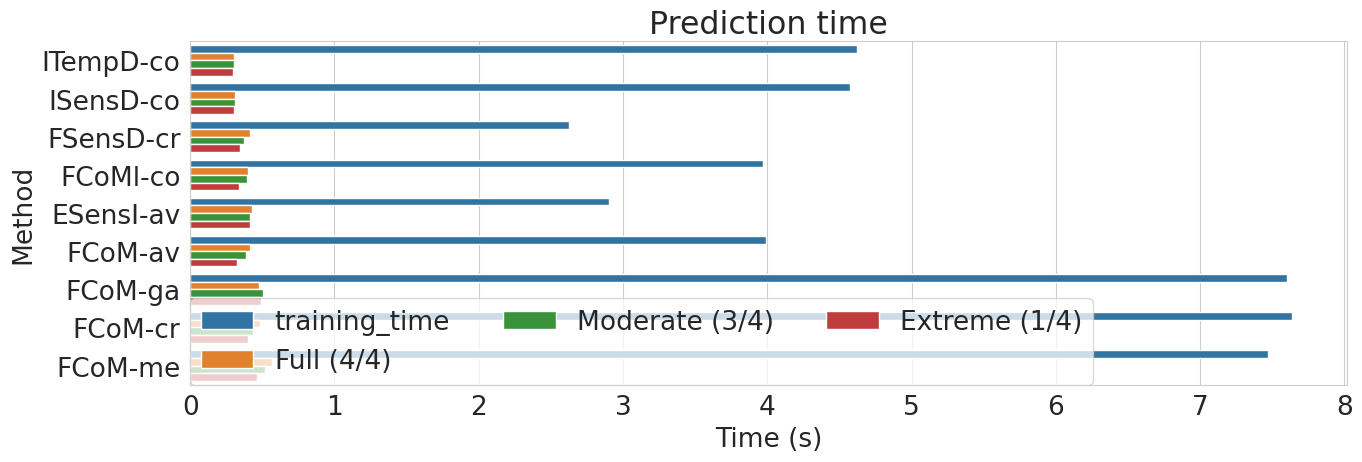

In [71]:
fig, ax = plt.subplots(1,1 ,squeeze=True, figsize=(14, 5))

sns.barplot(data=pred_df, y="index", x="time", hue="type", ax=ax, palette=colors)
#sns.barplot(data=pred_df, y=x_ticks_encoders, x="prediction_time_S1_weather_DEM_100", ax=ax[1], palette=colors)
ax.set_ylabel("Method")
ax.set_xlabel("Time (s)")
ax.set_title("Prediction time")
ax.legend(loc=(0,0), framealpha=0.75, ncols=3)

fig.tight_layout(w_pad=0.4)
plt.savefig("imgs/time_comparison.pdf", bbox_inches='tight')
plt.show()

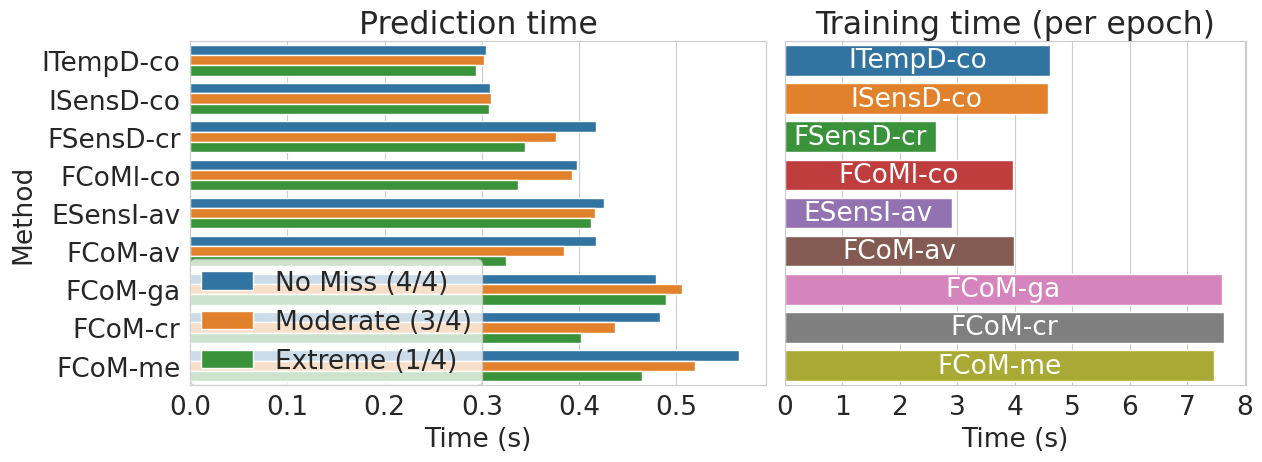

In [101]:
fig, ax = plt.subplots(1,2 ,squeeze=True, figsize=(13, 5), gridspec_kw={'width_ratios': [1.25, 1]})

sns.barplot(data=storage_pd, y=x_ticks_encoders, x="training_time", ax=ax[1], palette=colors)
ax[1].set_xlabel("Time (s)")
ax[1].set_xticks(np.arange(len(x_ticks_encoders)))
ax[1].set_title("Training time (per epoch)")
ylabels = [v.get_text() for v in ax[1].get_yticklabels()]
for i, container in enumerate(ax[1].containers):
    top_containers = []
    low_containers = []
    for value, label, c in zip(container.datavalues, ylabels, container):
        if value > 2:
            top_containers.append(label)
            low_containers.append("")
        else:
            top_containers.append("")
            low_containers.append(label)
    ax[1].bar_label(container, labels=top_containers, label_type="center", padding=0, color="white")
    ax[1].bar_label(container, labels=low_containers, label_type="edge", padding=0, color="black")
ax[1].set_yticks([])
ax[1].set_ylabel("")

sns.barplot(data=pred_df, y="index", x="time", hue="type", ax=ax[0], palette=colors)
ax[0].set_ylabel("Method")
ax[0].set_xlabel("Time (s)")
ax[0].set_title("Prediction time")
ax[0].legend(loc=(0,0), framealpha=0.75, ncols=1)


fig.tight_layout(w_pad=0.4)
plt.savefig("imgs/time_comparison.pdf", bbox_inches='tight')
plt.show()